***
<font size = 4> <center> General Approach to detecting muon tracks from data to simulation
***

In [1]:
import ROOT

#opening a root file from the directory and then pulling the contents of the folder out
f = ROOT.TFile.Open("/mnt/data/eos/run496/run496.root")
events = f.Get("events")
events.Print()

Welcome to JupyROOT 6.28/13
******************************************************************************
*Tree    :events    : events                                                 *
*Entries :  2676128 : Total =     40687285355 bytes  File  Size = 12093703217 *
*        :          : Tree compression factor =   3.37                       *
******************************************************************************
*Br    0 :event_number : event_number/I                                      *
*Entries :  2676128 : Total  Size=   10979161 bytes  File Size  =    4087598 *
*Baskets :     2716 : Basket Size=      32000 bytes  Compression=   2.67     *
*............................................................................*
*Br    1 :nhit      : nhit/I                                                 *
*Entries :  2676128 : Total  Size=   10957401 bytes  File Size  =    4313046 *
*Baskets :     2716 : Basket Size=      32000 bytes  Compression=   2.53     *
*......................

***
<font size = 4> <center> Looking at broken channels (start)
***

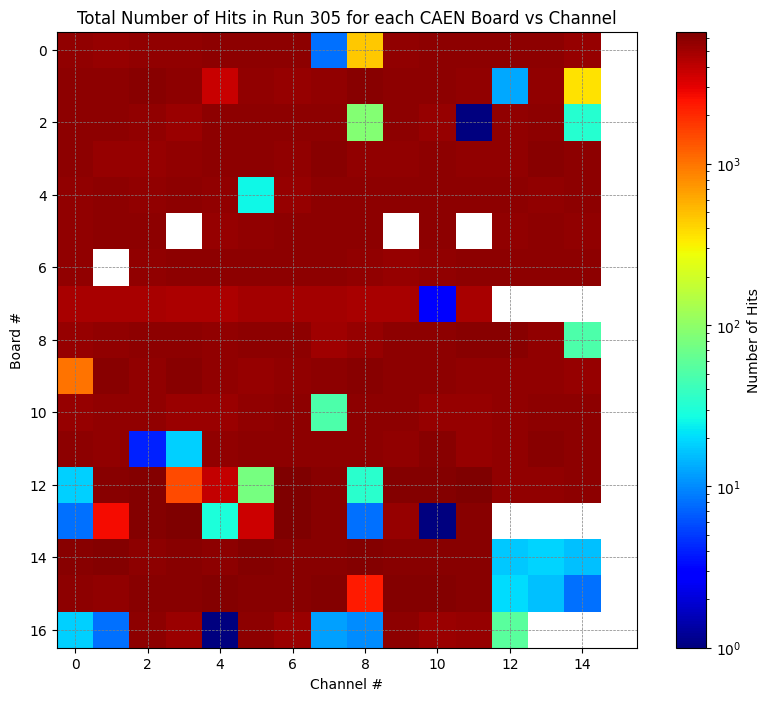

Total charge: [ 4890.61612216    90.87402344  9986.86035156 ... 21665.26677912
  8658.40820312  8602.8071733 ]
nMuonHits: 12282, nTotalHits: 1196319, nMuonHits/nTotalHits: 0.0103
Hits in B14-C11 to B15-C14: [[6083   17   19   16]
 [6103   20   16    8]]


In [14]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# SET THE RUN NUMBER
run_number = "305"

def load_data(run_number):
    rdf = ROOT.RDataFrame("events", f"/mnt/data/eos/run{run_number}/run{run_number}.root")
    columns = ["nhit", "event_number", "board", "channel", "charge", "deltat", "total_charge"]
    data = {col: rdf.AsNumpy(columns=[col])[col] for col in columns}
    return data

def process_hits(data):
    PMTHits = np.zeros((17, 16), dtype=int)
    for board, channel in zip(data["board"], data["channel"]):
        for b, c in zip(board, channel):
            PMTHits[b, c] += 1
    return PMTHits

def plot_hits(PMTHits, run_number):
    plt.figure(figsize=(10, 8))
    plt.imshow(PMTHits, cmap='jet', norm=colors.LogNorm())
    plt.title(f"Total Number of Hits in Run {run_number} for each CAEN Board vs Channel")
    plt.xlabel("Channel #")
    plt.ylabel("Board #")
    plt.colorbar(label="Number of Hits")
    plt.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=0.5)
    plt.show()

def calculate_statistics(PMTHits):
    nMuonHits = np.sum(PMTHits[14:16, 11:15])
    nTotalHits = np.sum(PMTHits)
    return nMuonHits, nTotalHits, nMuonHits / nTotalHits

data = load_data(run_number)
PMTHits = process_hits(data)
plot_hits(PMTHits, run_number)

nMuonHits, nTotalHits, muon_fraction = calculate_statistics(PMTHits)

print("Total charge:", data["total_charge"])  # Consider summarizing or processing total_charge if needed
print(f"nMuonHits: {nMuonHits}, nTotalHits: {nTotalHits}, nMuonHits/nTotalHits: {muon_fraction:.4f}")
print("Hits in B14-C11 to B15-C14:", PMTHits[14:16, 11:15])

Welcome to JupyROOT 6.28/13


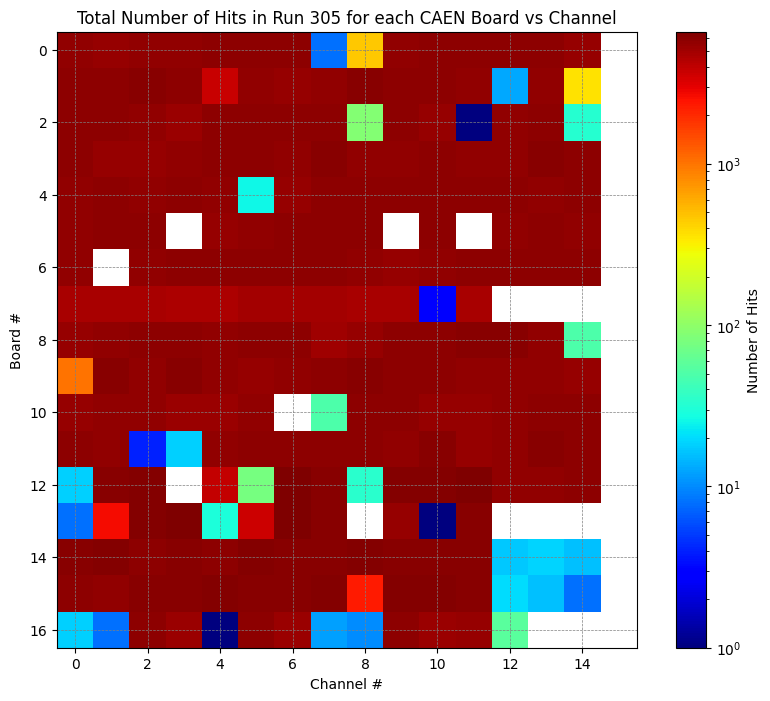

Total charge: [ 4890.61612216    90.87402344  9986.86035156 ... 21665.26677912
  8658.40820312  8602.8071733 ]
nMuonHits: 12282, nTotalHits: 1188966, nMuonHits/nTotalHits: 0.0103
Hits in B14-C11 to B15-C14: [[6083   17   19   16]
 [6103   20   16    8]]


In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# SET THE RUN NUMBER
run_number = "305"

# Define broken channels as a set of tuples (board, channel)
broken_channels = {(5, 3), (7, 12), (7, 13), (7, 14), (10, 6), (12, 3), (13, 8), (13, 12), (13, 13), (13, 14), (16, 13),(16, 14)}  # Replace with your actual broken channels

def load_data(run_number):
    rdf = ROOT.RDataFrame("events", f"/mnt/data/eos/run{run_number}/run{run_number}.root")
    columns = ["nhit", "event_number", "board", "channel", "charge", "deltat", "total_charge"]
    data = {col: rdf.AsNumpy(columns=[col])[col] for col in columns}
    return data

def process_hits(data, broken_channels):
    PMTHits = np.zeros((17, 16), dtype=int)
    for board, channel in zip(data["board"], data["channel"]):
        for b, c in zip(board, channel):
            if (b, c) not in broken_channels:
                PMTHits[b, c] += 1
    return PMTHits

def plot_hits(PMTHits, run_number):
    plt.figure(figsize=(10, 8))
    plt.imshow(PMTHits, cmap='jet', norm=colors.LogNorm())
    plt.title(f"Total Number of Hits in Run {run_number} for each CAEN Board vs Channel")
    plt.xlabel("Channel #")
    plt.ylabel("Board #")
    plt.colorbar(label="Number of Hits")
    plt.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=0.5)
    plt.show()

def calculate_statistics(PMTHits):
    nMuonHits = np.sum(PMTHits[14:16, 11:15])
    nTotalHits = np.sum(PMTHits)
    return nMuonHits, nTotalHits, nMuonHits / nTotalHits

data = load_data(run_number)
PMTHits = process_hits(data, broken_channels)
plot_hits(PMTHits, run_number)

nMuonHits, nTotalHits, muon_fraction = calculate_statistics(PMTHits)

print("Total charge:", data["total_charge"])  # Consider summarizing or processing total_charge if needed
print(f"nMuonHits: {nMuonHits}, nTotalHits: {nTotalHits}, nMuonHits/nTotalHits: {muon_fraction:.4f}")
print("Hits in B14-C11 to B15-C14:", PMTHits[14:16, 11:15])

In [ ]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# SET THE RUN NUMBER
run_number = "496"

# Define broken channels as a set of tuples (board, channel)
broken_channels = {(5, 3), (7, 12), (7, 13), (7, 14), (10, 6), (12, 3), (13, 8), (13, 12), (13, 13), (13, 14), (16, 13),(16, 14)}  # Replace with your actual broken channels

def load_data(run_number):
    rdf = ROOT.RDataFrame("events", f"/mnt/data/eos/run{run_number}/run{run_number}.root")
    columns = ["nhit", "event_number", "board", "channel", "charge", "deltat", "total_charge"]
    data = {col: rdf.AsNumpy(columns=[col])[col] for col in columns}
    return data

def process_hits(data, broken_channels):
    PMTHits = np.zeros((17, 16), dtype=int)
    total_hits = 0  # To keep track of the total number of hits ignoring broken channels
    
    for board, channel in zip(data["board"], data["channel"]):
        for b, c in zip(board, channel):
            if (b, c) not in broken_channels:
                PMTHits[b, c] += 1
                total_hits += 1
    
    return PMTHits, total_hits

def plot_hits(PMTHits, run_number):
    plt.figure(figsize=(10, 8))
    plt.imshow(PMTHits, cmap='jet', norm=colors.LogNorm())
    plt.title(f"Total Number of Hits in Run {run_number} for each CAEN Board vs Channel")
    plt.xlabel("Channel #")
    plt.ylabel("Board #")
    plt.colorbar(label="Number of Hits")
    plt.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=0.5)
    plt.show()

def calculate_statistics(PMTHits):
    nMuonHits = np.sum(PMTHits[14:16, 11:15])
    nTotalHits = np.sum(PMTHits)
    return nMuonHits, nTotalHits, nMuonHits / nTotalHits

data = load_data(run_number)
PMTHits, total_hits = process_hits(data, broken_channels)
plot_hits(PMTHits, run_number)

nMuonHits, nTotalHits, muon_fraction = calculate_statistics(PMTHits)

#print("Total charge:", data["total_charge"])  # Consider summarizing or processing total_charge if needed
print(f"Total hits (excluding broken channels): {total_hits}")
print(f"nMuonHits: {nMuonHits}, nTotalHits: {nTotalHits}, nMuonHits/nTotalHits: {muon_fraction:.4f}")
print("Hits in B14-C11 to B15-C14:", PMTHits[14:16, 11:15])

***
<font size = 4> <center> Looking at broken channels (end)
***

In [ ]:
#______________________displays a graph of the nhit distribution of zero, single, double, and triple events in the run_________________________________
#______________________________________________________________________________________________________________________________________________________
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

#run_number = "357"
run_number = "408" #6 hour run with MTCA@120mV prescale of 10
#run_number = "417" #6 hour run with no prescale

rdf = ROOT.RDataFrame("events","/mnt/data/eos/run"+run_number+"/run"+run_number+".root")
nhit = rdf.AsNumpy(columns=["nhit"])["nhit"]
event_number = rdf.AsNumpy(columns=["event_number"])["event_number"]
board = rdf.AsNumpy(columns=["board"])["board"]
channel = rdf.AsNumpy(columns=["channel"])["channel"]
charge = rdf.AsNumpy(columns=["charge"])["charge"]

nZero=0
nSingle=0
nDouble=0
nTriple=0

nhitZero = []
nhitSingle = []
nhitDouble = []
nhitTriple = []


for iEvt in range(0,len(event_number)):
    MuonHits = np.zeros((2, 3), dtype=bool)  # Use boolean array for MuonHits
    
    # Process hits for current event
    for iHit in range(len(board[iEvt])):
        b = board[iEvt][iHit]
        c = channel[iEvt][iHit]
#b is associated to the board and the c values are the associated channels to them
#when we add more channels or boards it will have to be adjusted accordingly
        
        if b == 14:
            if c == 12:
                MuonHits[0, 0] = True
            elif c == 13:
                MuonHits[0, 1] = True
            elif c == 14:
                MuonHits[0, 2] = True
        elif b == 15:
            if c == 12:
                MuonHits[1, 0] = True
            elif c == 13:
                MuonHits[1, 1] = True
            elif c == 14:
                MuonHits[1, 2] = True
    
    #Count events based on MuonHits pattern
    if not np.any(MuonHits):
        nZero += 1
        nhitZero.append(nhit[iEvt])
    elif MuonHits[1, 0] or MuonHits[1, 2]:
        nSingle += 1
        nhitSingle.append(nhit[iEvt])
        if MuonHits[1, 1] or MuonHits[0, 2]:
            nDouble += 1
            nhitDouble.append(nhit[iEvt])
            if MuonHits[0, 0] or MuonHits[0, 1]:
                nTriple += 1
                nhitTriple.append(nhit[iEvt])
                #nTriple_indices.append(iEvt)


print("Total Events=",len(event_number)," Zeros= ",nZero," Singles= ",nSingle," Doubles= ",nDouble, " Triples=",nTriple)
plt.figure(figsize=(10,6))

weightsZero = np.ones_like(nhitZero) / len(nhitZero)
weightsSingle = np.ones_like(nhitSingle) / len(nhitSingle)
weightsDouble = np.ones_like(nhitDouble) / len(nhitDouble)
weightsTriple = np.ones_like(nhitTriple) / len(nhitTriple)

plt.hist([nhitZero,nhitSingle,nhitDouble,nhitTriple],weights=[weightsZero,weightsSingle,weightsDouble,weightsTriple],label=["ZeroStacked","SingleStacked","DoubleStacked","TripleStacked"],
         color=["green","red","blue","black"],bins=range(0,225), stacked=True)
#plt.hist(nhitZero,color="green",alpha=0.7,label="ZeroNOTStacked",bins=range(0,225),density=True)

plt.xlabel("nhits",fontsize=18)
plt.ylabel("Each Histogram Normalized to 1",fontsize=15)
plt.legend()
plt.yscale('log')
plt.ylim(1e-4,2e-1)
plt.show()

Welcome to JupyROOT 6.28/13


In [ ]:
#______________________displays a graph of the nhit distribution of zero, single, double, and triple events in the run_________________________________
#______________________________________________________________________________________________________________________________________________________
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

#run_number = "357" #
run_number = "408" #6 hour run with MTCA@120mV prescale of 10
#run_number = "417" #6 hour run with no prescale

rdf = ROOT.RDataFrame("events","/mnt/data/eos/run"+run_number+"/run"+run_number+".root")
nhit = rdf.AsNumpy(columns=["nhit"])["nhit"]
event_number = rdf.AsNumpy(columns=["event_number"])["event_number"]
board = rdf.AsNumpy(columns=["board"])["board"]
channel = rdf.AsNumpy(columns=["channel"])["channel"]
charge = rdf.AsNumpy(columns=["charge"])["charge"]
deltat = rdf.AsNumpy(columns=["deltat"])["deltat"]

nZero=0
nSingle=0
nDouble=0
nTriple=0

deltatZero = []
deltatSingle = []
deltatDouble = []
deltatTriple = []


for iEvt in range(0,len(event_number)-1):
    MuonHits = np.zeros([2,3])    
    for iHit in range(0,len(board[iEvt])):
        if  (board[iEvt][iHit] == 14 and channel[iEvt][iHit] == 12):
           MuonHits[0,0]=1
        elif(board[iEvt][iHit] == 14 and channel[iEvt][iHit] == 13):
           MuonHits[0,1]=1      
        elif(board[iEvt][iHit] == 14 and channel[iEvt][iHit] == 14):
           MuonHits[0,2]=1
        elif(board[iEvt][iHit] == 15 and channel[iEvt][iHit] == 12):
           MuonHits[1,0]=1
        elif(board[iEvt][iHit] == 15 and channel[iEvt][iHit] == 13):
           MuonHits[1,1]=1
        elif(board[iEvt][iHit] == 15 and channel[iEvt][iHit] == 14):
           MuonHits[1,2]=1

    if(np.sum(MuonHits)==0): 
        nZero+=1
        deltatZero.append(deltat[iEvt+1])

    if(MuonHits[1,0] or MuonHits[1,2]):
        nSingle+=1
        deltatSingle.append(deltat[iEvt+1])
        if(MuonHits[1,1] or MuonHits[0,2]):
            #print("Double!",iEvt)
            nDouble+=1
            deltatDouble.append(deltat[iEvt+1])
            if(MuonHits[0,0] or MuonHits[0,1]):
                #print("Triple!",iEvt)
                nTriple+=1
                deltatTriple.append(deltat[iEvt+1])

print("Total Events=",len(event_number)," Zeros= ",nZero," Singles= ",nSingle," Doubles= ",nDouble, " Triples=",nTriple)
plt.figure(figsize=(10,6))

weightsZero = np.ones_like(deltatZero) / len(deltatZero)
weightsSingle = np.ones_like(deltatSingle) / len(deltatSingle)
weightsDouble = np.ones_like(deltatDouble) / len(deltatDouble)
weightsTriple = np.ones_like(deltatTriple) / len(deltatTriple)

plt.hist(deltatZero,weights=weightsZero,label="Zero",color="green",bins=range(0,25000,250),alpha=0.5)
plt.hist(deltatDouble,weights=weightsDouble,label="Double",color="blue",bins=range(0,25000,250),alpha=0.5)
         
#plt.hist(nhitZero,color="green",alpha=0.7,label="ZeroNOTStacked",bins=range(0,225),density=True)

plt.title("$\Delta$t [$\mu$s] for Run "+run_number)
plt.xlabel("$\Delta$t [$\mu$s]",fontsize=18) #adding title to x-axis with font size 18
plt.ylabel("Number of Events",fontsize=15) #adding title to y-axis with font size 15
plt.legend() #adding a legend for the weights, (weightszero, weightssingle, weightsdouble, weightstriple)
plt.yscale('log') #adding a log scale to the y-scale values
plt.show()

Welcome to JupyROOT 6.28/13


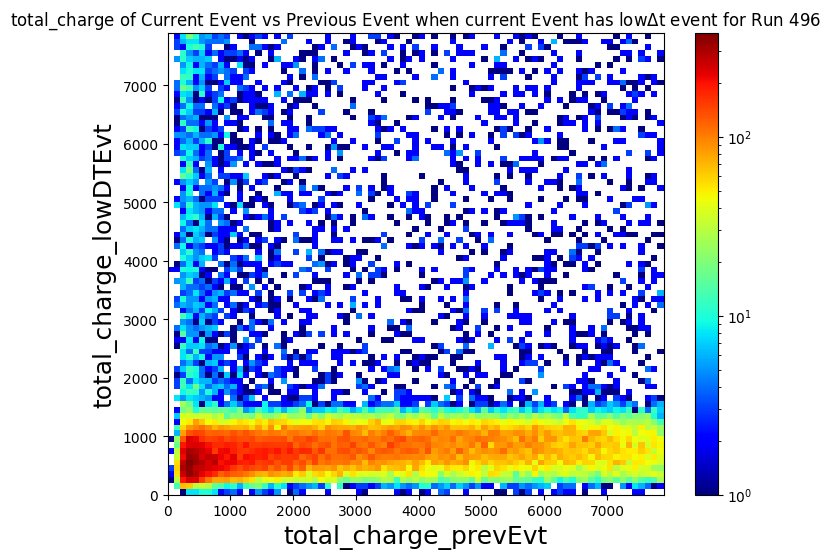

In [10]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

#run_number = "312" #
#run_number = "408" #6 hour run with MTCA@120mV prescale of 10
run_number = "496" #6 hour run with no prescale

rdf = ROOT.RDataFrame("events","/mnt/data/eos/run"+run_number+"/run"+run_number+".root")
nhit = rdf.AsNumpy(columns=["nhit"])["nhit"]
event_number = rdf.AsNumpy(columns=["event_number"])["event_number"]
board = rdf.AsNumpy(columns=["board"])["board"]
channel = rdf.AsNumpy(columns=["channel"])["channel"]
total_charge = rdf.AsNumpy(columns=["total_charge"])["total_charge"]
deltat = rdf.AsNumpy(columns=["deltat"])["deltat"]

nhit_prevEvt = []
total_charge_prevEvt =[]
nhit_lowDTEvt = []
total_charge_lowDTEvt =[]


for iEvt in range(0,len(event_number)):
    if(deltat[iEvt] < 10):
        nhit_prevEvt.append(nhit[iEvt-1])
        total_charge_prevEvt.append(total_charge[iEvt-1])
        nhit_lowDTEvt.append(nhit[iEvt])
        total_charge_lowDTEvt.append(total_charge[iEvt])


plt.figure(figsize=(8,6))
plt.hist2d(total_charge_prevEvt,total_charge_lowDTEvt,bins=[range(0,8000,100),range(0,8000,100)],cmap='jet',norm=colors.LogNorm())
plt.title("total_charge of Current Event vs Previous Event when current Event has low$\Delta$t event for Run "+run_number)
plt.xlabel("total_charge_prevEvt",fontsize=18)
plt.ylabel("total_charge_lowDTEvt",fontsize=18)
plt.colorbar()
plt.show()

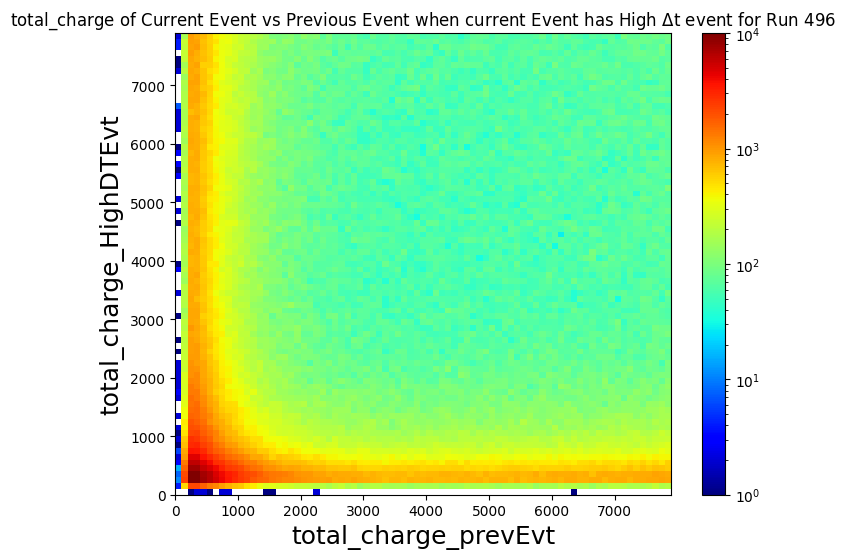

In [11]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

#run_number = "312" #
#run_number = "408" #6 hour run with MTCA@120mV prescale of 10
run_number = "496" #6 hour run with no prescale

rdf = ROOT.RDataFrame("events","/mnt/data/eos/run"+run_number+"/run"+run_number+".root")
nhit = rdf.AsNumpy(columns=["nhit"])["nhit"]
event_number = rdf.AsNumpy(columns=["event_number"])["event_number"]
board = rdf.AsNumpy(columns=["board"])["board"]
channel = rdf.AsNumpy(columns=["channel"])["channel"]
total_charge = rdf.AsNumpy(columns=["total_charge"])["total_charge"]
deltat = rdf.AsNumpy(columns=["deltat"])["deltat"]

nhit_prevEvt = []
total_charge_prevEvt =[]
nhit_lowDTEvt = []
total_charge_lowDTEvt =[]


for iEvt in range(0,len(event_number)):
    if(deltat[iEvt] > 100):
        nhit_prevEvt.append(nhit[iEvt-1])
        total_charge_prevEvt.append(total_charge[iEvt-1])
        nhit_lowDTEvt.append(nhit[iEvt])
        total_charge_lowDTEvt.append(total_charge[iEvt])


plt.figure(figsize=(8,6))
plt.hist2d(total_charge_prevEvt,total_charge_lowDTEvt,bins=[range(0,8000,100),range(0,8000,100)],cmap='jet',norm=colors.LogNorm())
plt.title("total_charge of Current Event vs Previous Event when current Event has High $\Delta$t event for Run "+run_number)
plt.xlabel("total_charge_prevEvt",fontsize=18)
plt.ylabel("total_charge_HighDTEvt",fontsize=18)
plt.colorbar()
plt.show()

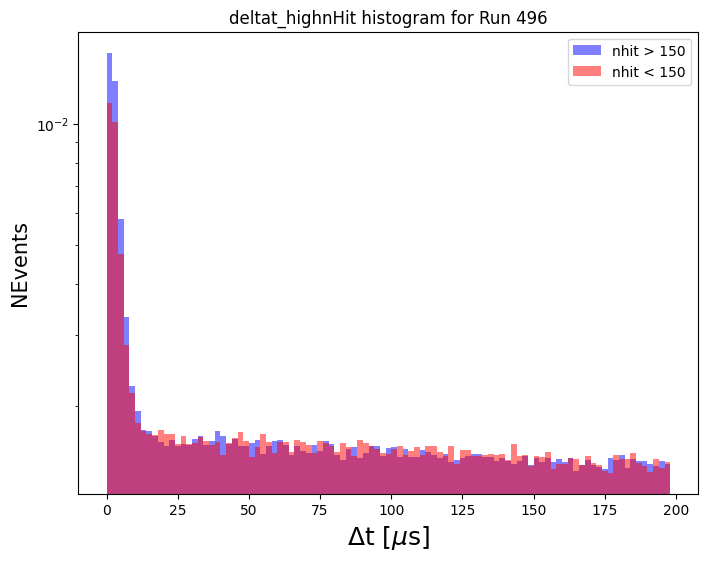

In [5]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

#run_number = "312" #
#run_number = "408" #6 hour run with MTCA@120mV prescale of 10
run_number = "496" #6 hour run with no prescale

rdf = ROOT.RDataFrame("events","/mnt/data/eos/run"+run_number+"/run"+run_number+".root")
nhit = rdf.AsNumpy(columns=["nhit"])["nhit"]
event_number = rdf.AsNumpy(columns=["event_number"])["event_number"]
board = rdf.AsNumpy(columns=["board"])["board"]
channel = rdf.AsNumpy(columns=["channel"])["channel"]
total_charge = rdf.AsNumpy(columns=["total_charge"])["total_charge"]
deltat = rdf.AsNumpy(columns=["deltat"])["deltat"]

deltat_highnhit = []
deltat_lownhit = []


for iEvt in range(0,len(event_number)-1):
    if(nhit[iEvt] > 150):
        deltat_highnhit.append(deltat[iEvt+1])
    else:        
        deltat_lownhit.append(deltat[iEvt+1])


#count, bin_edges = np.histogram(deltat_highnhit, bins=np.arange(0,1000,1))
#bin_centers =[]
#for ie in range(1,len(bin_edges)):
#    bin_centers.append((bin_edges[ie]+bin_edges[ie-1])/2)


plt.figure(figsize=(8,6))

weightsHigh = np.ones_like(deltat_highnhit) / len(deltat_highnhit)
weightsLow = np.ones_like(deltat_lownhit) / len(deltat_lownhit)
plt.hist(deltat_highnhit, bins=range(0,200,2), weights = weightsHigh, alpha=0.5, color ='blue', label="nhit > 150")
plt.hist(deltat_lownhit, bins=range(0,200,2), weights = weightsLow , alpha=0.5, color = 'red', label="nhit < 150")

plt.title("deltat_highnHit histogram for Run "+run_number)
plt.xlabel("$\Delta$t [$\mu$s]",fontsize=18)
plt.ylabel("NEvents",fontsize=15)
plt.legend()
plt.yscale('log')
plt.show()

In [ ]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

#run_number = "357" #
run_number = "496" #6 hour run with MTCA@120mV prescale of 10
#run_number = "417" #6 hour run with no prescale

rdf = ROOT.RDataFrame("events","/mnt/data/eos/run"+run_number+"/run"+run_number+".root")
nhit = rdf.AsNumpy(columns=["nhit"])["nhit"]
event_number = rdf.AsNumpy(columns=["event_number"])["event_number"]
board = rdf.AsNumpy(columns=["board"])["board"]
channel = rdf.AsNumpy(columns=["channel"])["channel"]
charge = rdf.AsNumpy(columns=["charge"])["charge"]
deltat = rdf.AsNumpy(columns=["deltat"])["deltat"]

nZero=0
nSingle=0
nDouble=0
nTriple=0

deltatZero = []
deltatSingle = []
deltatDouble = []
deltatTriple = []


for iEvt in range(0,len(event_number)-1):
    MuonHits = np.zeros([2,3])    
    for iHit in range(0,len(board[iEvt])):
        if  (board[iEvt][iHit] == 14 and channel[iEvt][iHit] == 12):
           MuonHits[0,0]=1
        elif(board[iEvt][iHit] == 14 and channel[iEvt][iHit] == 13):
           MuonHits[0,1]=1      
        elif(board[iEvt][iHit] == 14 and channel[iEvt][iHit] == 14):
           MuonHits[0,2]=1
        elif(board[iEvt][iHit] == 15 and channel[iEvt][iHit] == 12):
           MuonHits[1,0]=1
        elif(board[iEvt][iHit] == 15 and channel[iEvt][iHit] == 13):
           MuonHits[1,1]=1
        elif(board[iEvt][iHit] == 15 and channel[iEvt][iHit] == 14):
           MuonHits[1,2]=1

    if(np.sum(MuonHits)==0): 
        nZero+=1
        deltatZero.append(deltat[iEvt+1])

    if(MuonHits[1,0] or MuonHits[1,2]):
        nSingle+=1
        deltatSingle.append(deltat[iEvt+1])
        if(MuonHits[1,1] or MuonHits[0,2]):
            #print("Double!",iEvt)
            nDouble+=1
            deltatDouble.append(deltat[iEvt+1])
            if(MuonHits[0,0] or MuonHits[0,1]):
                #print("Triple!",iEvt)
                nTriple+=1
                deltatTriple.append(deltat[iEvt+1])

print("Total Events=",len(event_number)," Zeros= ",nZero," Singles= ",nSingle," Doubles= ",nDouble, " Triples=",nTriple)
plt.figure(figsize=(10,6))

weightsZero = np.ones_like(deltatZero) / len(deltatZero)
weightsSingle = np.ones_like(deltatSingle) / len(deltatSingle)
weightsDouble = np.ones_like(deltatDouble) / len(deltatDouble)
weightsTriple = np.ones_like(deltatTriple) / len(deltatTriple)

plt.hist(deltatZero,weights=weightsZero,label="Zero",color="green",bins=range(0,25000,250),alpha=0.5)
plt.hist(deltatDouble,weights=weightsDouble,label="Double",color="blue",bins=range(0,25000,250),alpha=0.5)
         
#plt.hist(nhitZero,color="green",alpha=0.7,label="ZeroNOTStacked",bins=range(0,225),density=True)

plt.title("$\Delta$t [$\mu$s] for Run "+run_number)
plt.xlabel("$\Delta$t [$\mu$s]",fontsize=18)
plt.ylabel("Number of Events",fontsize=15)
plt.legend()
plt.yscale('log')
plt.show()

Total Events= 3464681  Zeros=  2528746  Singles=  15257  Doubles=  1493  Triples= 415


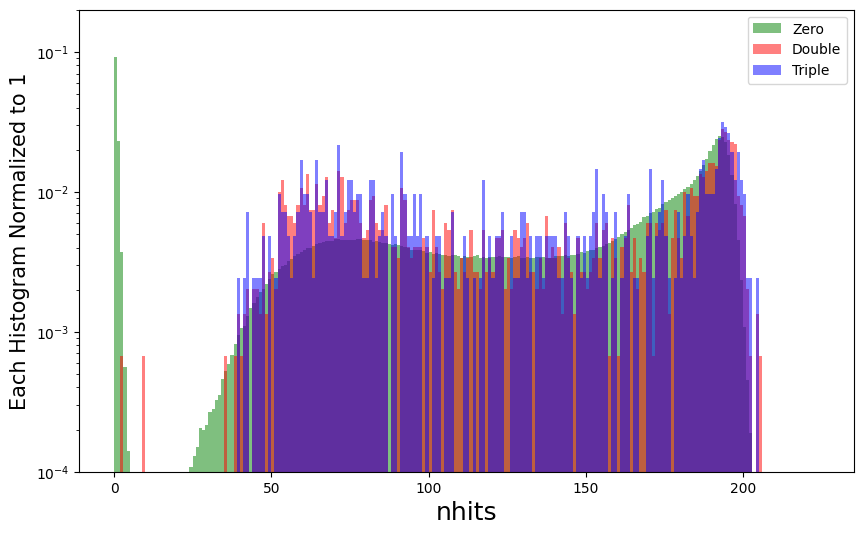

In [3]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

#run_number = "357"
run_number = "408" #6 hour run with MTCA@120mV prescale of 10
#run_number = "417" #6 hour run with no prescale

rdf = ROOT.RDataFrame("events","/mnt/data/eos/run"+run_number+"/run"+run_number+".root")
nhit = rdf.AsNumpy(columns=["nhit"])["nhit"]
event_number = rdf.AsNumpy(columns=["event_number"])["event_number"]
board = rdf.AsNumpy(columns=["board"])["board"]
channel = rdf.AsNumpy(columns=["channel"])["channel"]
charge = rdf.AsNumpy(columns=["charge"])["charge"]

nZero=0
nSingle=0
nDouble=0
nTriple=0

nhitZero = []
nhitSingle = []
nhitDouble = []
nhitTriple = []


for iEvt in range(0,len(event_number)):
    MuonHits = np.zeros([2,3])    
    for iHit in range(0,len(board[iEvt])):
        if  (board[iEvt][iHit] == 14 and channel[iEvt][iHit] == 12):
           MuonHits[0,0]=1
        elif(board[iEvt][iHit] == 14 and channel[iEvt][iHit] == 13):
           MuonHits[0,1]=1      
        elif(board[iEvt][iHit] == 14 and channel[iEvt][iHit] == 14):
           MuonHits[0,2]=1
        elif(board[iEvt][iHit] == 15 and channel[iEvt][iHit] == 12):
           MuonHits[1,0]=1
        elif(board[iEvt][iHit] == 15 and channel[iEvt][iHit] == 13):
           MuonHits[1,1]=1
        elif(board[iEvt][iHit] == 15 and channel[iEvt][iHit] == 14):
           MuonHits[1,2]=1

    if(np.sum(MuonHits)==0): 
        nZero+=1
        nhitZero.append(nhit[iEvt])

    if(MuonHits[1,0] or MuonHits[1,2]):
        nSingle+=1
        nhitSingle.append(nhit[iEvt])
        if(MuonHits[1,1] or MuonHits[0,2]):
            #print("Double!",iEvt)
            nDouble+=1
            nhitDouble.append(nhit[iEvt])
            if(MuonHits[0,0] or MuonHits[0,1]):
                #print("Triple!",iEvt)
                nTriple+=1
                nhitTriple.append(nhit[iEvt])

print("Total Events=",len(event_number)," Zeros= ",nZero," Singles= ",nSingle," Doubles= ",nDouble, " Triples=",nTriple)
plt.figure(figsize=(10,6))

weightsZero = np.ones_like(nhitZero) / len(nhitZero)
weightsSingle = np.ones_like(nhitSingle) / len(nhitSingle)
weightsDouble = np.ones_like(nhitDouble) / len(nhitDouble)
weightsTriple = np.ones_like(nhitTriple) / len(nhitTriple)

plt.hist(nhitZero,color="green",alpha=0.5,label="Zero",bins=range(0,225),density=True)
plt.hist(nhitDouble,color="red",alpha=0.5,label="Double",bins=range(0,225),density=True)
plt.hist(nhitTriple,color="blue",alpha=0.5,label="Triple",bins=range(0,225),density=True)

#plt.hist([nhitZero,nhitSingle,nhitDouble,nhitTriple], alpha = 1, weights=[weightsZero,weightsSingle,weightsDouble,weightsTriple],label=["ZeroStacked","SingleStacked","DoubleStacked","TripleStacked"],
#         color=["green","red","blue","black"],bins=range(0,225), stacked=True)
#plt.hist(nhitZero,color="green",alpha=0.7,label="ZeroNOTStacked",bins=range(0,225),density=True)

plt.xlabel("nhits",fontsize=18)
plt.ylabel("Each Histogram Normalized to 1",fontsize=15)
plt.legend()
plt.yscale('log')
plt.ylim(1e-4,2e-1)
plt.show()

***
<font size = 6> <center> Monte Carlo simulation below (start)
***

In [4]:
import ROOT

# Open the ROOT file
file_path = "/mnt/data/eos/simulations/eos_sky_100k_muon_paddles/eos_sky_100k_muon_paddles.root"
f = ROOT.TFile.Open(file_path)

# Check if the file was opened successfully
if not f or f.IsZombie():
    print(f"Error opening file: {file_path}")
else:
    # List all keys in the ROOT file
    print("Listing all keys in the file:")
    f.ls()

    # Get the tree from the file
    events = f.Get("output")

    # Check if the tree was found
    if events:
        # Print the structure of the tree
        print("\nTree structure:")
        events.Print()
    else:
        print("Tree 'output' not found in the file.")

# Close the ROOT file
f.Close()

Listing all keys in the file:

Tree structure:
TFile**		/mnt/data/eos/simulations/eos_sky_100k_muon_paddles/eos_sky_100k_muon_paddles.root	
 TFile*		/mnt/data/eos/simulations/eos_sky_100k_muon_paddles/eos_sky_100k_muon_paddles.root	
  KEY: TTree	meta;1	meta
  KEY: TTree	output;1	output
******************************************************************************
*Tree    :output    : output                                                 *
*Entries :   315941 : Total =     49027915419 bytes  File  Size = 28172582028 *
*        :          : Tree compression factor =   1.74                       *
******************************************************************************
*Br    0 :mcpdg     : mcpdg/I                                                *
*Entries :   315941 : Total  Size=    1555657 bytes  File Size  =     569675 *
*Baskets :     3102 : Basket Size=      32000 bytes  Compression=   2.62     *
*............................................................................*
*

Error in <TInterpreter::TCling::AutoLoad>: failure loading library libRATDict.so for vector<vector<int> >
Error in <TInterpreter::TCling::AutoLoad>: failure loading library libRATDict.so for vector<vector<int> >
Error in <TInterpreter::TCling::AutoLoad>: failure loading library libRATDict.so for vector<vector<int> >


Processing Event#: 0
Processing Event#: 1000
Processing Event#: 2000
Processing Event#: 3000
Processing Event#: 4000
Processing Event#: 5000
Processing Event#: 6000
Processing Event#: 7000
Processing Event#: 8000
Processing Event#: 9000
Processing Event#: 10000
Processing Event#: 11000
Processing Event#: 12000
Processing Event#: 13000
Processing Event#: 14000
Processing Event#: 15000
Processing Event#: 16000
Processing Event#: 17000
Processing Event#: 18000
Processing Event#: 19000
Processing Event#: 20000
Processing Event#: 21000
Processing Event#: 22000
Processing Event#: 23000
Processing Event#: 24000
Processing Event#: 25000


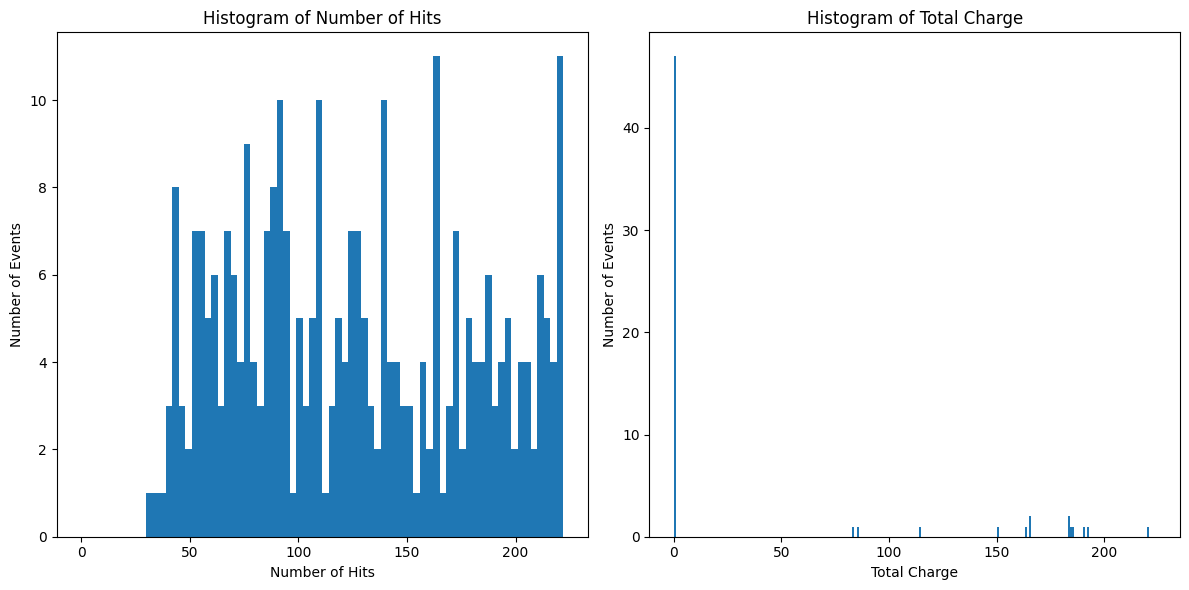

Fraction of events with muon neutrinos: 0.0158


Error in <TInterpreter::TCling::AutoLoad>: failure loading library libRATDict.so for vector<vector<int> >


In [6]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

# Load data using ROOT RDataFrame
rdf = ROOT.RDataFrame("output", "/mnt/data/eos/simulations/eos_sky_100k_muon_paddles/eos_sky_100k_muon_paddles.root")

# Extract columns into NumPy arrays
mcpdg = rdf.AsNumpy(columns=["mcpdg"])["mcpdg"]
trackPDG = rdf.AsNumpy(columns=["trackPDG"])["trackPDG"]
nhits = rdf.AsNumpy(columns=["nhits"])["nhits"]
hitPMTDigitizedCharge = rdf.AsNumpy(columns=["hitPMTDigitizedCharge"])["hitPMTDigitizedCharge"]

# Initialize lists for events with neutrinos
nhitsWithMuNu = []
hitPMTDigitizedTotalCharge = []

# Loop over events
nEventWithMuNu = 0
for iEvt in range(len(trackPDG)):
    if iEvt % 1000 == 0:
        print(f"Processing Event#: {iEvt}")

    # Check for neutrinos
    if any(pdg == 14 or pdg == -14 for pdg in trackPDG[iEvt]):
        nEventWithMuNu += 1
        nhitsWithMuNu.append(nhits[iEvt])
        
        # Calculate total charge
        total_charge = np.sum(hitPMTDigitizedCharge[iEvt])
        hitPMTDigitizedTotalCharge.append(total_charge)

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(nhitsWithMuNu, bins=range(0, 225, 3))
plt.xlabel("Number of Hits")
plt.ylabel("Number of Events")
plt.title("Histogram of Number of Hits")

plt.subplot(1, 2, 2)
plt.hist(hitPMTDigitizedTotalCharge, bins=range(0, 225, 1))
plt.xlabel("Total Charge")
plt.ylabel("Number of Events")
plt.title("Histogram of Total Charge")

plt.tight_layout()
plt.show()

# Print event ratio
total_events = len(trackPDG)
print(f"Fraction of events with muon neutrinos: {nEventWithMuNu / total_events:.4f}")


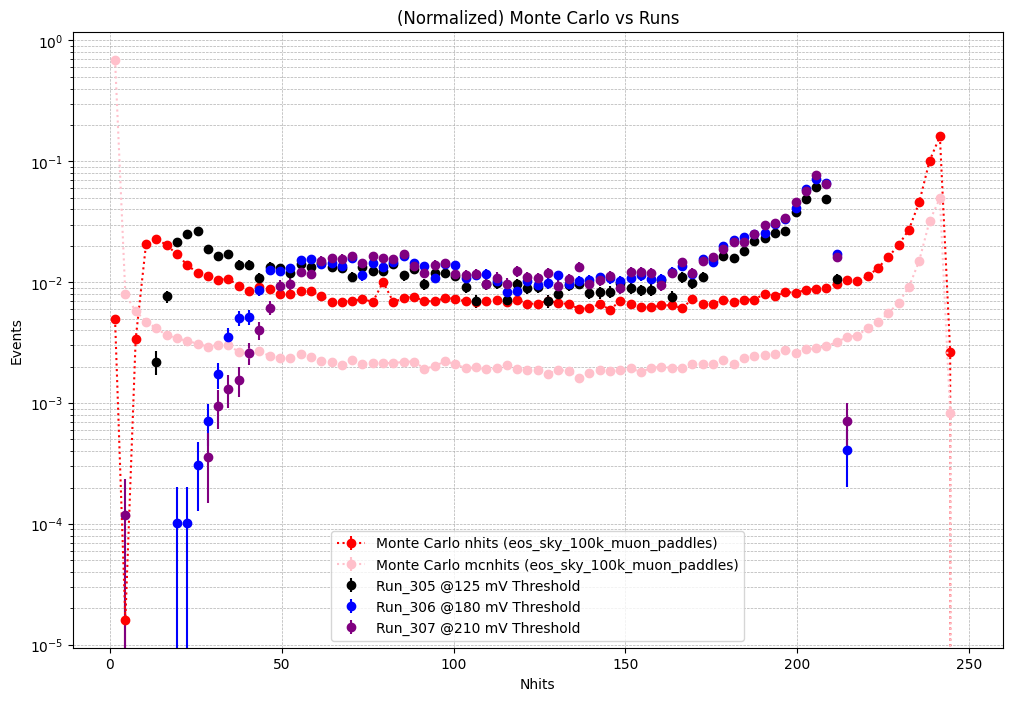

Error in <TInterpreter::TCling::AutoLoad>: failure loading library libRATDict.so for vector<vector<int> >


In [8]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Load Monte Carlo data
rdf_mc1 = ROOT.RDataFrame("output", "/mnt/data/eos/simulations/eos_sky_100k_muon_paddles/eos_sky_100k_muon_paddles.root")

# Convert to numpy arrays
#mcpdg = rdf_mc.AsNumpy(columns=["mcpdg"])["mcpdg"]
#trackPDG = rdf_mc.AsNumpy(columns=["trackPDG"])["trackPDG"]
nhits1 = rdf_mc1.AsNumpy(columns=["nhits"])["nhits"]
mcnhits = rdf_mc1.AsNumpy(columns = ["mcnhits"])["mcnhits"]
#hitPMTDigitizedCharge = rdf_mc.AsNumpy(columns=["hitPMTDigitizedCharge"])["hitPMTDigitizedCharge"]

# Load real world data
run_number1 = "305"
rdf_real1 = ROOT.RDataFrame("events", f"/mnt/data/eos/run{run_number1}/run{run_number1}.root")
run_number2 = "306"
rdf_real2 = ROOT.RDataFrame("events", f"/mnt/data/eos/run{run_number2}/run{run_number2}.root")
run_number2 = "307"
rdf_real3 = ROOT.RDataFrame("events", f"/mnt/data/eos/run{run_number2}/run{run_number2}.root")


# Convert to numpy arrays
#total_charge = rdf_real.AsNumpy(columns=["total_charge"])["total_charge"]
nhit1 = rdf_real1.AsNumpy(columns=["nhit"])["nhit"]
nhit2 = rdf_real2.AsNumpy(columns=["nhit"])["nhit"]
nhit3 = rdf_real3.AsNumpy(columns=["nhit"])["nhit"]

# Create histograms
bins = np.arange(0, 250, 3)  # Define bin edges

# Compute histograms
mc_hist1, _ = np.histogram(nhits1, bins=bins)
mc_hist2, _ = np.histogram(mcnhits, bins=bins)
real_hist1, _ = np.histogram(nhit1, bins=bins)
real_hist2, _ = np.histogram(nhit2, bins=bins)
real_hist3, _ = np.histogram(nhit3, bins=bins)

#normalizing the monte carlo histograms
mc_hist1_normalized = mc_hist1 / np.sum(mc_hist1)
mc_hist2_normalized = mc_hist2 / np.sum(mc_hist2)

#normalizing the real data histograms
real_hist1_normalized = real_hist1 / np.sum(real_hist1)
real_hist2_normalized = real_hist2 / np.sum(real_hist2)
real_hist3_normalized = real_hist3 / np.sum(real_hist3)


#error for histograms
mc_errors1 = np.sqrt(mc_hist1) / np.sum(mc_hist1)
mc_errors2 = np.sqrt(mc_hist2) / np.sum(mc_hist2)

real_errors1 = np.sqrt(real_hist1) / np.sum(real_hist1)
real_errors2 = np.sqrt(real_hist2) / np.sum(real_hist2)
real_errors3 = np.sqrt(real_hist3) / np.sum(real_hist3)
# Plotting

plt.figure(figsize=(12, 8))

#real_errors1 = np.sqrt(real_hist1)
#real_errors2 = np.sqrt(real_hist2)
#real_errors3 = np.sqrt(real_hist3)

# Plot Real Data with error bars
plt.errorbar(bins[:-1] + np.diff(bins) / 2, mc_hist1_normalized, yerr=mc_errors1, fmt='o', label='Monte Carlo nhits (eos_sky_100k_muon_paddles)', color='red', linestyle = ':')#linewidth=2
plt.errorbar(bins[:-1] + np.diff(bins) / 2, mc_hist2_normalized, yerr=mc_errors2, fmt='o', label='Monte Carlo mcnhits (eos_sky_100k_muon_paddles)', color='pink', linestyle = ':')#linewidth=2

plt.errorbar(bins[:-1] + np.diff(bins) / 2, real_hist1_normalized, yerr=real_errors1, fmt = 'o', label='Run_305 @125 mV Threshold', color='black')#linewidth=2
plt.errorbar(bins[:-1] + np.diff(bins) / 2, real_hist2_normalized, yerr=real_errors2, fmt = 'o', label='Run_306 @180 mV Threshold', color='blue')#linewidth=2
plt.errorbar(bins[:-1] + np.diff(bins) / 2, real_hist3_normalized, yerr=real_errors3, fmt = 'o', label='Run_307 @210 mV Threshold', color='purple')#linewidth=2

# Add labels and title
plt.yscale('log')
plt.xlabel('Nhits')
plt.ylabel('Events')
plt.title('(Normalized) Monte Carlo vs Runs')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

***
<font size = 5> Plotting different runs with the same prescale to Monte Carlo simulation
***

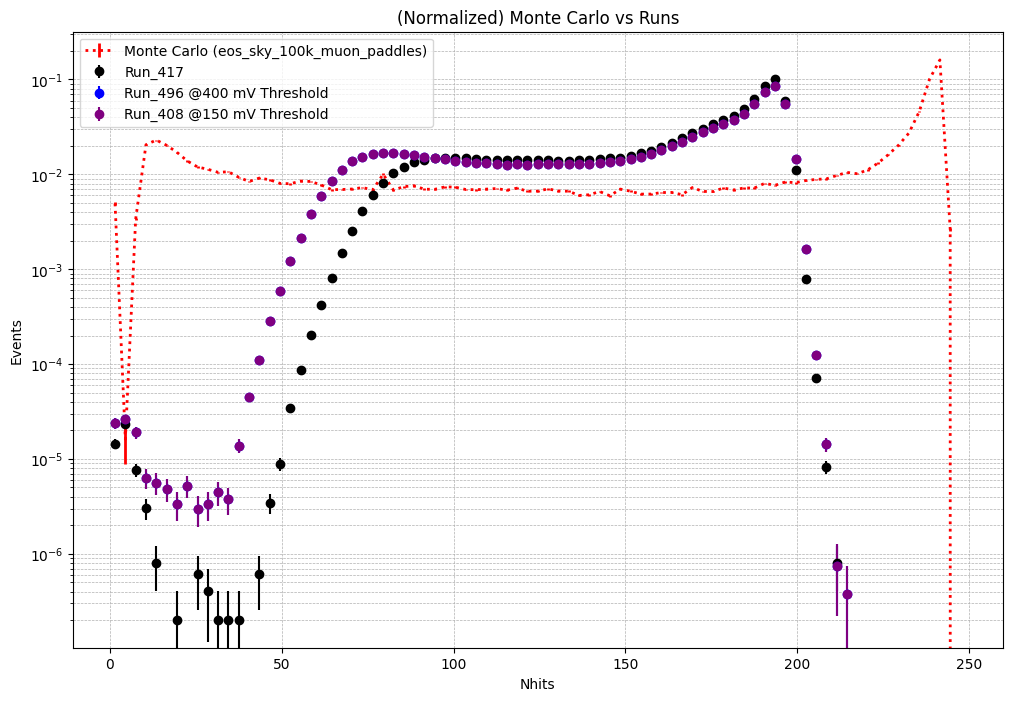

Error in <TInterpreter::TCling::AutoLoad>: failure loading library libRATDict.so for vector<vector<int> >


In [81]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Load Monte Carlo data
rdf_mc1 = ROOT.RDataFrame("output", "/mnt/data/eos/simulations/eos_sky_100k_muon_paddles/eos_sky_100k_muon_paddles.root")

# Convert to numpy arrays
#mcpdg = rdf_mc.AsNumpy(columns=["mcpdg"])["mcpdg"]
#trackPDG = rdf_mc.AsNumpy(columns=["trackPDG"])["trackPDG"]
nhits1 = rdf_mc1.AsNumpy(columns=["nhits"])["nhits"]
#hitPMTDigitizedCharge = rdf_mc.AsNumpy(columns=["hitPMTDigitizedCharge"])["hitPMTDigitizedCharge"]

# Load real world data
run_number1 = "417"
rdf_real1 = ROOT.RDataFrame("events", f"/mnt/data/eos/run{run_number1}/run{run_number1}.root")
run_number2 = "496"
rdf_real2 = ROOT.RDataFrame("events", f"/mnt/data/eos/run{run_number2}/run{run_number2}.root")
run_number3 = "408"
rdf_real3 = ROOT.RDataFrame("events", f"/mnt/data/eos/run{run_number2}/run{run_number2}.root")


# Convert to numpy arrays
#total_charge = rdf_real.AsNumpy(columns=["total_charge"])["total_charge"]
nhit1 = rdf_real1.AsNumpy(columns=["nhit"])["nhit"]
nhit2 = rdf_real2.AsNumpy(columns=["nhit"])["nhit"]
nhit3 = rdf_real3.AsNumpy(columns=["nhit"])["nhit"]

# Create histograms
bins = np.arange(0, 250, 3)  # Define bin edges

# Compute histograms
mc_hist1, _ = np.histogram(nhits1, bins=bins)
real_hist1, _ = np.histogram(nhit1, bins=bins)
real_hist2, _ = np.histogram(nhit2, bins=bins)
real_hist3, _ = np.histogram(nhit3, bins=bins)

#normalizing the monte carlo histograms
mc_hist1_normalized = mc_hist1 / np.sum(mc_hist1)

#normalizing the real data histograms
real_hist1_normalized = real_hist1 / np.sum(real_hist1)
real_hist2_normalized = real_hist2 / np.sum(real_hist2)
real_hist3_normalized = real_hist3 / np.sum(real_hist3)


#error for histograms
mc_errors1 = np.sqrt(mc_hist1) / np.sum(mc_hist1)

real_errors1 = np.sqrt(real_hist1) / np.sum(real_hist1)
real_errors2 = np.sqrt(real_hist2) / np.sum(real_hist2)
real_errors3 = np.sqrt(real_hist3) / np.sum(real_hist3)
# Plotting

plt.figure(figsize=(12, 8))

#real_errors1 = np.sqrt(real_hist1)
#real_errors2 = np.sqrt(real_hist2)
#real_errors3 = np.sqrt(real_hist3)

# Plot Real Data with error bars
plt.errorbar(bins[:-1] + np.diff(bins) / 2, mc_hist1_normalized, yerr=mc_errors1, label='Monte Carlo (eos_sky_100k_muon_paddles)', color='red', linestyle = ':', linewidth = 2)#linewidth=2

plt.errorbar(bins[:-1] + np.diff(bins) / 2, real_hist1_normalized, yerr=real_errors1, fmt = 'o', label='Run_417', color='black')#linewidth=2
plt.errorbar(bins[:-1] + np.diff(bins) / 2, real_hist2_normalized, yerr=real_errors2, fmt = 'o', label='Run_496 @400 mV Threshold', color='blue')# capsize=9, elinewidth=1linewidth=2
plt.errorbar(bins[:-1] + np.diff(bins) / 2, real_hist3_normalized, yerr=real_errors3, fmt = 'o', label='Run_408 @150 mV Threshold', color='purple')#linewidth=2

# Add labels and title
plt.yscale('log')
plt.xlabel('Nhits')
plt.ylabel('Events')
plt.title('(Normalized) Monte Carlo vs Runs')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

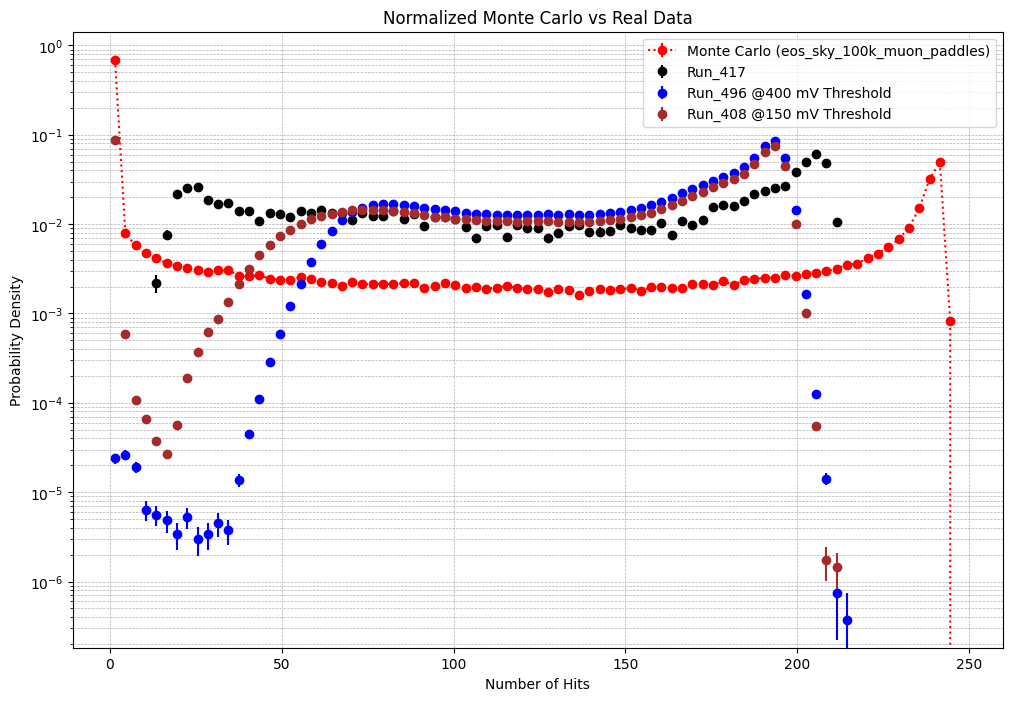

Error in <TInterpreter::TCling::AutoLoad>: failure loading library libRATDict.so for vector<vector<int> >


In [10]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

# Load Monte Carlo data
#rdf_mc1 = ROOT.RDataFrame("output", "/mnt/data/eos/simulations/muon/eos_muon_water_trigthres30_70kcomb.root")
rdf_mc1 = ROOT.RDataFrame("output", "/mnt/data/eos/simulations/eos_sky_100k_muon_paddles/eos_sky_100k_muon_paddles.root")

# Convert to numpy arrays
#nhits1 = rdf_mc1.AsNumpy(columns=["nhits"])["nhits"]
nhits1 = rdf_mc1.AsNumpy(columns=["nhits"])["nhits"]

# Load real world data
run_number1 = "417"
rdf_real1 = ROOT.RDataFrame("events", f"/mnt/data/eos/run{run_number1}/run{run_number1}.root")
run_number2 = "496"
rdf_real2 = ROOT.RDataFrame("events", f"/mnt/data/eos/run{run_number2}/run{run_number2}.root")
run_number3 = "408"
rdf_real3 = ROOT.RDataFrame("events", f"/mnt/data/eos/run{run_number3}/run{run_number3}.root")

# Convert to numpy arrays
#nhit1 = rdf_real1.AsNumpy(columns=["nhit"])["nhit"]
nhit2 = rdf_real2.AsNumpy(columns=["nhit"])["nhit"]
nhit3 = rdf_real3.AsNumpy(columns=["nhit"])["nhit"]

# Create histograms
range_min, range_max = 60, 200

# Find the bin indices that fall within the specified range
bin_edges = np.linspace(bins[0], bins[-1], len(bins)+1)
bin_indices = np.where((bin_edges[:-1] >= range_min) & (bin_edges[1:] <= range_max))[0]


# Compute histograms for monte carlo
mc_hist1, _ = np.histogram(nhits1, bins=bins)

# comput histogram for real data
real_hist1, _ = np.histogram(nhit1, bins=bins)
real_hist2, _ = np.histogram(nhit2, bins=bins)
real_hist3, _ = np.histogram(nhit3, bins=bins)

# Normalize histograms for Monte Carlo data
mc_hist1_normalized = mc_hist1 / np.sum(mc_hist1)

# Normalize histograms for Real data

real_hist1_normalized = real_hist1 / np.sum(real_hist1)
real_hist2_normalized = real_hist2 / np.sum(real_hist2)
real_hist3_normalized = real_hist3 / np.sum(real_hist3)

# Statistical errors for histograms
mc_errors1 = np.sqrt(mc_hist1) / np.sum(mc_hist1)

real_errors1 = np.sqrt(real_hist1) / np.sum(real_hist1)
real_errors2 = np.sqrt(real_hist2) / np.sum(real_hist2)
real_errors3 = np.sqrt(real_hist3) / np.sum(real_hist3)

# Plotting
plt.figure(figsize=(12, 8))

# Plot Monte Carlo data with error bars
#plt.errorbar(bins[:-1] + np.diff(bins) / 2, mc_hist1_normalized, yerr=mc_errors1, fmt='o', label='Monte Carlo (eos_muon_water_trigthres30_70kcomb)', color='red', linestyle=':')
plt.errorbar(bins[:-1] + np.diff(bins) / 2, mc_hist2_normalized, yerr=mc_errors2, fmt='o', label='Monte Carlo (eos_sky_100k_muon_paddles)', color='red', linestyle=':')

# Plot Real Data with error bars
plt.errorbar(bins[:-1] + np.diff(bins) / 2, real_hist1_normalized, yerr=real_errors1, fmt = 'o', label='Run_417', color='black')#linewidth=2
plt.errorbar(bins[:-1] + np.diff(bins) / 2, real_hist2_normalized, yerr=real_errors2, fmt = 'o', label='Run_496 @400 mV Threshold', color='blue')#linewidth=2
plt.errorbar(bins[:-1] + np.diff(bins) / 2, real_hist3_normalized, yerr=real_errors3, fmt = 'o', label='Run_408 @150 mV Threshold', color='brown')#linewidth=2

# Add labels and title
plt.yscale('log')
plt.xlabel('Number of Hits')
plt.ylabel('Probability Density')
plt.title('Normalized Monte Carlo vs Real Data')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


***
<font size = 5> Trying to extrapolate the total charge in monte carlo simulations

In [11]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Load Monte Carlo data
rdf_mc = ROOT.RDataFrame("output", "/mnt/data/eos/simulations/muon/eos_muon_water_trigthres30_70kcomb.root")
#rdf_mc = ROOT.RDataFrame("output", "/mnt/data/eos/simulations/eos_sky_100k_muon_paddles/eos_sky_100k_muon_paddles.root")

# Convert to numpy arrays
mcpdg = rdf_mc.AsNumpy(columns=["mcpdg"])["mcpdg"]
nhits = rdf_mc.AsNumpy(columns=["nhits"])["nhits"]
trackPDG = rdf_mc.AsNumpy(columns=["trackPDG"])["trackPDG"]
mcke = rdf_mc.AsNumpy(columns=["mcke"])["mcke"]
hitPMTDigitizedCharge = rdf_mc.AsNumpy(columns=["hitPMTDigitizedCharge"])["hitPMTDigitizedCharge"]

# Initialize lists
nhitsWithMuNu = []
total_charge_with_mu_nu = []

# Process events
nEventWithMuNu = 0
for iEvt in range(len(trackPDG)):
    if iEvt % 1000 == 0:
        print("Event#:", iEvt)
    
    # Check if event contains muon/antimuon
    FoundMuNu = any(pdg in (14, -14) for pdg in trackPDG[iEvt])
    
    if FoundMuNu:
        nEventWithMuNu += 1
        nhitsWithMuNu.append(nhits[iEvt])
        
        # Ensure the index is valid
        if iEvt < len(hitPMTDigitizedTotalCharge):
            charge_list = hitPMTDigitizedTotalCharge[iEvt]
            
            # Check if the charge list is valid
            if isinstance(charge_list, list) or isinstance(charge_list, np.ndarray):
                if charge_list:  # Ensure list is not empty
                    total_charge = sum(charge_list)
                    total_charge_with_mu_nu.append(total_charge)
                else:
                    print(f"Warning: 'hitPMTDigitizedTotalCharge' list for event {iEvt} is empty.")
            else:
                print(f"Warning: 'hitPMTDigitizedTotalCharge' for event {iEvt} is not a list or array.")
        else:
            print(f"Warning: Index {iEvt} is out of range for 'hitPMTDigitizedTotalCharge'.")

print(f"Number of events with muon/antimuon: {nEventWithMuNu}")

#__________________________________________________________Real DATA BELOW___________________________________________________________________________
# Load real world data
run_number = "496"
rdf_real = ROOT.RDataFrame("events", f"/mnt/data/eos/run{run_number}/run{run_number}.root")

# Convert to numpy arrays
total_charge = rdf_real.AsNumpy(columns=["total_charge"])["total_charge"]
nhit = rdf_real.AsNumpy(columns=["nhit"])["nhit"]

#__________________________________________________________________________________________________________________________________________________

#___________________________________________________________Making plots and parameters____________________________________________________________
# Create histograms
bins = np.arange(0, 500, 2)  # Define bin edges

# Compute histograms
mc_hist, _ = np.histogram(nhitsWithMuNu, bins=bins)
real_hist, _ = np.histogram(total_charge, bins=bins)

# Plotting
plt.figure(figsize=(10, 6))

mc_errors = np.sqrt(mc_hist)
real_errors = np.sqrt(real_hist)

plt.errorbar(bins[:-1] + np.diff(bins) / 2, mc_hist, yerr=mc_errors, fmt='o', label='Monte Carlo', color='red', linestyle='-',)#linewidth=2

plt.errorbar(bins[:-1] + np.diff(bins) / 2, real_hist, yerr=real_errors, fmt='o', label='Data', color='blue', linestyle='--',)#linewidth=2

# Add labels and title
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total Charge')
plt.ylabel('Counts')
plt.title('Monte Carlo vs Run_496')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Event#: 0


NameError: name 'hitPMTDigitizedTotalCharge' is not defined

Error in <TInterpreter::TCling::AutoLoad>: failure loading library libRATDict.so for vector<vector<int> >


Event#: 0
Event#: 1000
Event#: 2000
Event#: 3000
Event#: 4000
Event#: 5000
Event#: 6000
Event#: 7000
Event#: 8000
Event#: 9000
Event#: 10000
Event#: 11000
Event#: 12000
Event#: 13000
Event#: 14000
Event#: 15000
Event#: 16000
Event#: 17000
Event#: 18000
Event#: 19000
Event#: 20000
Event#: 21000
Event#: 22000
Event#: 23000
Event#: 24000
Event#: 25000
Event#: 26000
Event#: 27000
Event#: 28000
Event#: 29000
Event#: 30000
Event#: 31000
Event#: 32000
Event#: 33000
Event#: 34000
Event#: 35000
Event#: 36000
Event#: 37000
Event#: 38000
Event#: 39000
Event#: 40000
Event#: 41000
Event#: 42000
Event#: 43000
Event#: 44000
Event#: 45000
Event#: 46000
Event#: 47000
Event#: 48000
Event#: 49000
Event#: 50000
Event#: 51000
Event#: 52000
Event#: 53000
Event#: 54000
Event#: 55000
Event#: 56000
Event#: 57000
Event#: 58000
Event#: 59000
Event#: 60000
Event#: 61000
Event#: 62000
Event#: 63000
Event#: 64000
Event#: 65000
Event#: 66000
Event#: 67000
Event#: 68000
Event#: 69000
Event#: 70000
Event#: 71000
Event

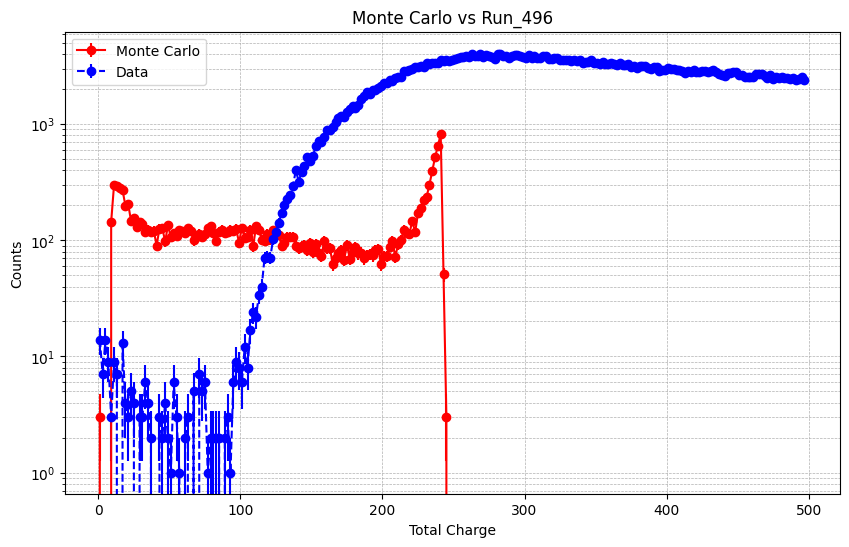

Error in <TInterpreter::TCling::AutoLoad>: failure loading library libRATDict.so for vector<vector<int> >


In [49]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Load Monte Carlo data
#rdf_mc = ROOT.RDataFrame("output", "/mnt/data/eos/simulations/muon/eos_muon_water_trigthres30_70kcomb.root")
rdf_mc = ROOT.RDataFrame("output", "/mnt/data/eos/simulations/eos_sky_100k_muon_paddles/eos_sky_100k_muon_paddles.root")

# Convert to numpy arrays
mcpdg = rdf_mc.AsNumpy(columns=["mcpdg"])["mcpdg"]
nhits = rdf_mc.AsNumpy(columns=["nhits"])["nhits"]
trackPDG = rdf_mc.AsNumpy(columns=["trackPDG"])["trackPDG"]
mcke = rdf_mc.AsNumpy(columns=["mcke"])["mcke"]
mcke = rdf_mc.AsNumpy(columns=["mcke"])["mcke"]
digitCharge = rdf_mc.AsNumpy(columns=["digitCharge"])["digitCharge"]
#hitPMTDigitizedCharge = rdf_mc.AsNumpy(columns=["hitPMTDigitizedCharge"])["hitPMTDigitizedCharge"]
#hitPMTCharge = rdf_mc.AsNumpy(columns=["hitPMTCharge"])["hitPMTCharge"]

# Initialize lists
nhitsWithMuNu = []
total_charge_with_mu_nu = []

# Process events
nEventWithMuNu = 0
for iEvt in range(len(trackPDG)):
    if iEvt % 1000 == 0:
        print("Event#:", iEvt)
    
    # Check if event contains muon/antimuon
    FoundMuNu = any(pdg in (14, -14) for pdg in trackPDG[iEvt])
    
    if FoundMuNu:
        nEventWithMuNu += 1
        nhitsWithMuNu.append(nhits[iEvt])
        
        # Ensure the index is valid
        if iEvt < len(digitCharge):
            charge_list = digitCharge[iEvt]
            
            # Check if the charge list is valid
            if isinstance(charge_list, list) or isinstance(charge_list, np.ndarray):
                if charge_list:  # Ensure list is not empty
                    total_charge = sum(charge_list)
                    total_charge_with_mu_nu.append(total_charge)
                else:
                    print(f"Warning: 'digitCharge' list for event {iEvt} is empty.")
            else:
                print(f"Warning: 'digitCharge' for event {iEvt} is not a list or array.")
        else:
            print(f"Warning: Index {iEvt} is out of range for 'digitCharge'.")

print(f"Number of events with muon/antimuon: {nEventWithMuNu}")

#__________________________________________________________Real DATA BELOW___________________________________________________________________________
# Load real world data
run_number = "496"
rdf_real = ROOT.RDataFrame("events", f"/mnt/data/eos/run{run_number}/run{run_number}.root")

# Convert to numpy arrays
total_charge = rdf_real.AsNumpy(columns=["total_charge"])["total_charge"]
nhit = rdf_real.AsNumpy(columns=["nhit"])["nhit"]

#__________________________________________________________________________________________________________________________________________________

#___________________________________________________________Making plots and parameters____________________________________________________________
# Create histograms
bins = np.arange(0, 500, 2)  # Define bin edges

# Compute histograms
mc_hist, _ = np.histogram(nhitsWithMuNu, bins=bins)
real_hist, _ = np.histogram(total_charge, bins=bins)

# Plotting
plt.figure(figsize=(10, 6))

mc_errors = np.sqrt(mc_hist)
real_errors = np.sqrt(real_hist)

plt.errorbar(bins[:-1] + np.diff(bins) / 2, mc_hist, yerr=mc_errors, fmt='o', label='Monte Carlo', color='red', linestyle='-',)#linewidth=2

plt.errorbar(bins[:-1] + np.diff(bins) / 2, real_hist, yerr=real_errors, fmt='o', label='Data', color='blue', linestyle='--',)#linewidth=2

# Add labels and title
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total Charge')
plt.ylabel('Counts')
plt.title('Monte Carlo vs Run_496')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [44]:
import ROOT

# Open the ROOT file
#file_path = "/mnt/data/eos/simulations/muon/eos_muon_water_trigthres30_70kcomb.root"
file_path = "/mnt/data/eos/simulations/eos_sky_100k_muon_paddles/eos_sky_100k_muon_paddles.root"
f = ROOT.TFile.Open(file_path)

# Check if the file was opened successfully
if not f or f.IsZombie():
    print(f"Error opening file: {file_path}")
else:
    # List all keys in the ROOT file
    print("Listing all keys in the file:")
    f.ls()

    # Get the tree from the file
    events = f.Get("output")

    # Check if the tree was found
    if events:
        # Print the structure of the tree
        print("\nTree structure:")
        events.Print()
    else:
        print("Tree 'output' not found in the file.")

# Close the ROOT file
f.Close()

Listing all keys in the file:

Tree structure:
TFile**		/mnt/data/eos/simulations/eos_sky_100k_muon_paddles/eos_sky_100k_muon_paddles.root	
 TFile*		/mnt/data/eos/simulations/eos_sky_100k_muon_paddles/eos_sky_100k_muon_paddles.root	
  KEY: TTree	meta;1	meta
  KEY: TTree	output;1	output
******************************************************************************
*Tree    :output    : output                                                 *
*Entries :   315941 : Total =     49027915419 bytes  File  Size = 28172582028 *
*        :          : Tree compression factor =   1.74                       *
******************************************************************************
*Br    0 :mcpdg     : mcpdg/I                                                *
*Entries :   315941 : Total  Size=    1555657 bytes  File Size  =     569675 *
*Baskets :     3102 : Basket Size=      32000 bytes  Compression=   2.62     *
*............................................................................*
*

Error in <TInterpreter::TCling::AutoLoad>: failure loading library libRATDict.so for vector<vector<int> >
Error in <TInterpreter::TCling::AutoLoad>: failure loading library libRATDict.so for vector<vector<int> >


In [40]:
import ROOT

f = ROOT.TFile.Open("/mnt/data/eos/run496/run496.root")
events = f.Get("events")
events.Print()

******************************************************************************
*Tree    :events    : events                                                 *
*Entries :  2676128 : Total =     40687285355 bytes  File  Size = 12093703217 *
*        :          : Tree compression factor =   3.37                       *
******************************************************************************
*Br    0 :event_number : event_number/I                                      *
*Entries :  2676128 : Total  Size=   10979161 bytes  File Size  =    4087598 *
*Baskets :     2716 : Basket Size=      32000 bytes  Compression=   2.67     *
*............................................................................*
*Br    1 :nhit      : nhit/I                                                 *
*Entries :  2676128 : Total  Size=   10957401 bytes  File Size  =    4313046 *
*Baskets :     2716 : Basket Size=      32000 bytes  Compression=   2.53     *
*..................................................